# Multiple Linear Regression Model
## Part B - Section IV

This part contains the linear model performed by the function lm() in R.


---
**Description:** reproduction of the results presented in section IV.B in the paper 'Online Sharing of physical activity'.

**Author:** Eric Araujo

---

In [1]:
getWholeCommunity <- function(){
  path <- "./data/original"
  communityWithoutNA <- read.csv(paste(path, "/allCommunitiesWithoutNA.csv", sep=""))
  return (communityWithoutNA)
}

In [2]:
getWholeNonCommunity <- function(){
  path <- "./data/original"
  nonCommunityWithoutNA <- read.csv(paste(path, "/allnonCommunitiesWithoutNA.csv", sep=""))
  return (nonCommunityWithoutNA)
}

### Raw data from the files

In [3]:
# Get data from the files
community <- getWholeCommunity()
nonCommunity <- getWholeNonCommunity()

### Selection of days to build the model
Weeks 2 and 3 are the start PAL, and the last 3 weeks are the final PAL.

In [4]:
# 2 first weeks (weeks 2 and 3)
start_weeks_com = community[,9:22]
start_weeks_non = nonCommunity[,9:22]
# 3 last weeks
last_weeks_com = community[,65:85]
last_weeks_non = nonCommunity[,65:85]

### Create the data frames with the means for the start and last weeks.

In [5]:
df_com = data.frame(id=community$id, start_mean=rowMeans(start_weeks_com), last_mean=rowMeans(last_weeks_com))
df_non = data.frame(id=nonCommunity$id, start_mean=rowMeans(start_weeks_non), last_mean=rowMeans(last_weeks_non))

### Add the categorical variable and merge the data frames

In [6]:
df_non['isCommunity'] <- as.factor(0)
df_com['isCommunity'] <- as.factor(1)

In [7]:
df <- rbind(df_non, df_com)

In [8]:
levels(df$isCommunity)

[1] "0" "1"

### Build and summarize the model

In [9]:
model <- lm(last_mean ~ start_mean + isCommunity, data=df)

In [10]:
summary(model)


Call:
lm(formula = last_mean ~ start_mean + isCommunity, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.61607 -0.09273  0.00998  0.09852  1.59376 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.23562    0.06743   3.494 0.000512 ***
start_mean    0.85041    0.04091  20.786  < 2e-16 ***
isCommunity1  0.05061    0.02327   2.175 0.030047 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1959 on 579 degrees of freedom
Multiple R-squared:  0.4395,	Adjusted R-squared:  0.4375 
F-statistic:   227 on 2 and 579 DF,  p-value: < 2.2e-16


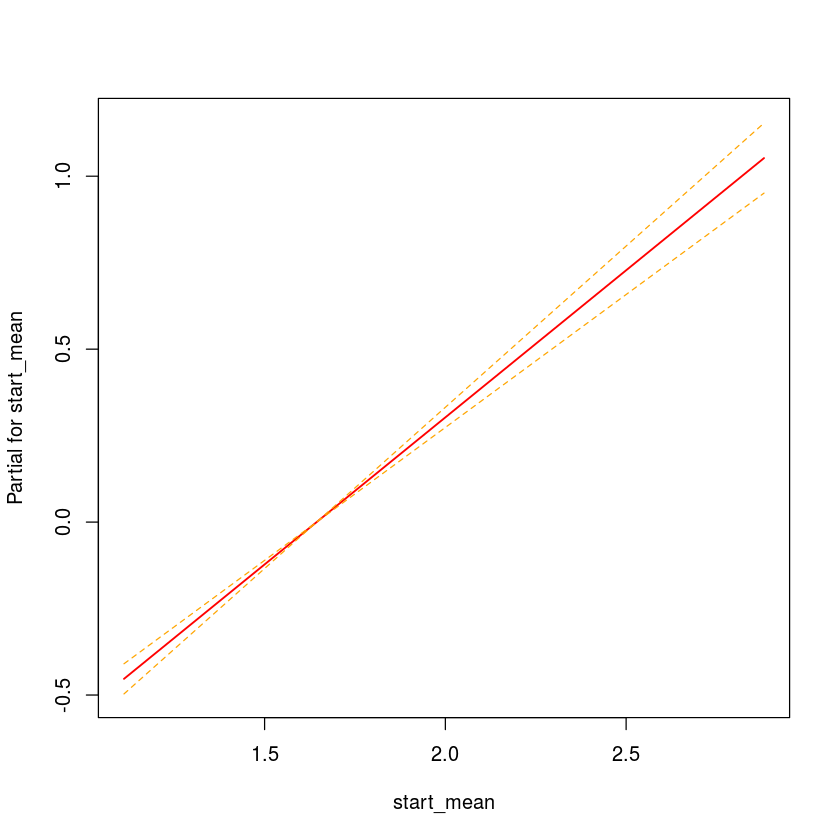

In [11]:
termplot(model, se = TRUE, terms = "start_mean")

In [12]:
confint(model, level=0.95)

,2.5 %,97.5 %
(Intercept),0.103183199,0.36806404
start_mean,0.770053966,0.93076099
isCommunity1,0.004904269,0.09631087
